<a href="https://colab.research.google.com/github/vatsmanish/Handwritten_ocr_experiment/blob/master/Copy_of_Project_INC_V3_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from collections import namedtuple
import torch
import torch.nn as nn
import torch.nn.functional as F

In [0]:
__all__ = ['Inception3', 'inception_v3']

_InceptionOutputs = namedtuple('InceptionOutputs', ['logits', 'aux_logits'])

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir('/content/drive/My Drive/')

In [0]:
!ls



 6_3_Pytorch_Colab_cat_vs_dog_ipynb.ipynb
 Blackoffer
'Capstone Experiment.gsheet'
'cat vs dog'
'Cluster Analysis Assignment.ipynb'
 colab_notebooks
'Colab Notebooks'
'Copy of bureau_balance.csv'
'Copy of bureau.csv'
'Copy of credit_card_balance.csv'
'Copy of HomeCredit_columns_description.csv'
'Copy of installments_payments.csv'
'Copy of POS_CASH_balance.csv'
'Copy of previous_application.csv'
'Copy of sample_submission.csv'
 D19018.csv
 D19018.docx
'D19018 exam.txt'
'D19018 -logistics regression-manish kumar.R'
'D19018-MANISH KUMAR-HYPERPARAMETER TUNNING.ipynb'
'D19018 - Manish Kumar.ipynb'
 D19018_Manish_Kumar.pdf
'D19018_MANISH KUMAR_SAMPLING_DISTRIBUTION.ipynb'
'D19018-MANISH KUMAR-SAMPLING_DISTRIBUTION-PART-B.ipynb'
 D19018-Manish-kumar-Testing-of-hypothesis.html
'D19018 MANISH KUMAR.txt'
 D19018_Manish_Kumar.zip
'D19018_MI_CosineSimilarity_Manish kumar.ipynb'
 D19018_NFL.twbx
'D19018_Statistics_cosineSimilarityDendogram_Manish kumar.ipynb'
 D19039,D19018.R
 data
 fifa18.csv
'fin

In [0]:
def inception_v3(pretrained=False, **kwargs):
  
  if pretrained:
    if 'transform_input' not in kwargs:
      kwargs['transform_input'] = True
    if 'aux_logits' in kwargs:
      original_aux_logits = kwargs['aux_logits']
      kwargs['aux_logits'] = True
    else:
      original_aux_logits = True
    model = Inception3(**kwargs)
    if not original_aux_logits:
      model.aux_logits = False
    return model

  return Inception3(**kwargs)

In [0]:
class Inception3(nn.Module):

  def __init__(self, num_classes=50, aux_logits=True, transform_input=True):
    super(Inception3, self).__init__()
    self.aux_logits = aux_logits
    self.transform_input = transform_input
    self.Conv2d_1a_3x3 = BasicConv2d(3, 32, kernel_size=3, stride=2)
    self.Conv2d_2a_3x3 = BasicConv2d(32, 32, kernel_size=3)
    self.Conv2d_2b_3x3 = BasicConv2d(32, 64, kernel_size=3, padding=1)
    self.Conv2d_3b_1x1 = BasicConv2d(64, 80, kernel_size=1)
    self.Conv2d_4a_3x3 = BasicConv2d(80, 192, kernel_size=3)
    self.Mixed_5b = InceptionA(192, pool_features=32)
    self.Mixed_5c = InceptionA(256, pool_features=64)
    self.Mixed_5d = InceptionA(288, pool_features=64)
    self.Mixed_6a = InceptionB(288)
    self.Mixed_6b = InceptionC(768, channels_7x7=128)
    self.Mixed_6c = InceptionC(768, channels_7x7=160)
    self.Mixed_6d = InceptionC(768, channels_7x7=160)
    self.Mixed_6e = InceptionC(768, channels_7x7=192)
    if aux_logits:
      self.AuxLogits = InceptionAux(768, num_classes)
    self.Mixed_7a = InceptionD(768)
    self.Mixed_7b = InceptionE(1280)
    self.Mixed_7c = InceptionE(2048)
    self.fc = nn.Linear(2048, num_classes)

    for m in self.modules():
      if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        import scipy.stats as stats
        stddev = m.stddev if hasattr(m, 'stddev') else 0.1
        X = stats.truncnorm(-2, 2, scale=stddev)
        values = torch.as_tensor(X.rvs(m.weight.numel()), dtype=m.weight.dtype)
        values = values.view(m.weight.size())
        with torch.no_grad():
          m.weight.copy_(values)
      elif isinstance(m, nn.BatchNorm2d):
        nn.init.constant_(m.weight, 1)
        nn.init.constant_(m.bias, 0)

  def forward(self, x):
    global aux
    

    x_ch0 = torch.unsqueeze(x[:, 0], 1) * (0.229 / 0.5) + (0.485 - 0.5) / 0.5
    x_ch1 = torch.unsqueeze(x[:, 1], 1) * (0.224 / 0.5) + (0.456 - 0.5) / 0.5
    x_ch2 = torch.unsqueeze(x[:, 2], 1) * (0.225 / 0.5) + (0.406 - 0.5) / 0.5
    x = torch.cat((x_ch0, x_ch1, x_ch2), 1)

    #print(x.shape) 
    # N x 3 x 299 x 299
    x = self.Conv2d_1a_3x3(x)
    #print(x.shape)
    # N x 32 x 149 x 149
    x = self.Conv2d_2a_3x3(x)
    # print(x.shape)
    # N x 32 x 147 x 147
    x = self.Conv2d_2b_3x3(x)
    #print(x.shape)
    # N x 64 x 147 x 147
    x = F.max_pool2d(x, kernel_size=3, stride=2)
    #print(x.shape)
    # N x 64 x 73 x 73
    x = self.Conv2d_3b_1x1(x)
    #print(x.shape)
    # N x 80 x 73 x 73
    x = self.Conv2d_4a_3x3(x)
    #print(x.shape)
    # N x 192 x 71 x 71
    x = F.max_pool2d(x, kernel_size=3, stride=2)
    #print(x.shape)
    # N x 192 x 35 x 35
    x = self.Mixed_5b(x)
    #print(x.shape)
    # N x 256 x 35 x 35
    x = self.Mixed_5c(x)
    #print(x.shape)
    # N x 288 x 35 x 35
    x = self.Mixed_5d(x)
    #print(x.shape)
    # N x 288 x 35 x 35
    x = self.Mixed_6a(x)
    #print(x.shape)
    # N x 768 x 17 x 17
    x = self.Mixed_6b(x)
    #print(x.shape)
    # N x 768 x 17 x 17
    x = self.Mixed_6c(x)
    #print(x.shape)
    # N x 768 x 17 x 17
    x = self.Mixed_6d(x)
    #print(x.shape)
    # N x 768 x 17 x 17
    x = self.Mixed_6e(x)
    #print(x.shape)
    # N x 768 x 17 x 17
    if self.training and self.aux_logits:
      aux = self.AuxLogits(x)
    #print(x.shape)
    # N x 768 x 17 x 17
    x = self.Mixed_7a(x)
    #print(x.shape)
    # N x 1280 x 8 x 8
    x = self.Mixed_7b(x)
    #print(x.shape)
    # N x 2048 x 8 x 8
    x = self.Mixed_7c(x)
    #print(x.shape)
    # N x 2048 x 8 x 8
    # Adaptive average pooling
    x = F.adaptive_avg_pool2d(x, (1, 1)) # this is not run
    # N x 2048 x 1 x 1
    x = F.dropout(x, training=self.training)
    #print(x.shape)
    # N x 2048 x 1 x 1
    x = torch.flatten(x, 1)
    #print(x.shape)
    # N x 2048
    x = self.fc(x)
    print(x.shape)
    # N x 100 (num_classes)
    if self.training and self.aux_logits:
      return _InceptionOutputs(x, aux)
    return x

In [0]:
class InceptionA(nn.Module):

  def __init__(self, in_channels, pool_features):
    super(InceptionA, self).__init__()
    self.branch1x1 = BasicConv2d(in_channels, 64, kernel_size=1)

    self.branch5x5_1 = BasicConv2d(in_channels, 48, kernel_size=1)
    self.branch5x5_2 = BasicConv2d(48, 64, kernel_size=5, padding=2)

    self.branch3x3dbl_1 = BasicConv2d(in_channels, 64, kernel_size=1)
    self.branch3x3dbl_2 = BasicConv2d(64, 96, kernel_size=3, padding=1)
    self.branch3x3dbl_3 = BasicConv2d(96, 96, kernel_size=3, padding=1)

    self.branch_pool = BasicConv2d(in_channels, pool_features, kernel_size=1)

  def forward(self, x):
    branch1x1 = self.branch1x1(x)

    branch5x5 = self.branch5x5_1(x)
    branch5x5 = self.branch5x5_2(branch5x5)

    branch3x3dbl = self.branch3x3dbl_1(x)
    branch3x3dbl = self.branch3x3dbl_2(branch3x3dbl)
    branch3x3dbl = self.branch3x3dbl_3(branch3x3dbl)

    branch_pool = F.avg_pool2d(x, kernel_size=3, stride=1, padding=1)
    branch_pool = self.branch_pool(branch_pool)

    outputs = [branch1x1, branch5x5, branch3x3dbl, branch_pool]
    return torch.cat(outputs, 1)

In [0]:
class InceptionB(nn.Module):

  def __init__(self, in_channels):
    super(InceptionB, self).__init__()
    self.branch3x3 = BasicConv2d(in_channels, 384, kernel_size=3, stride=2)

    self.branch3x3dbl_1 = BasicConv2d(in_channels, 64, kernel_size=1)
    self.branch3x3dbl_2 = BasicConv2d(64, 96, kernel_size=3, padding=1)
    self.branch3x3dbl_3 = BasicConv2d(96, 96, kernel_size=3, stride=2)

  def forward(self, x):
    branch3x3 = self.branch3x3(x)

    branch3x3dbl = self.branch3x3dbl_1(x)
    branch3x3dbl = self.branch3x3dbl_2(branch3x3dbl)
    branch3x3dbl = self.branch3x3dbl_3(branch3x3dbl)

    branch_pool = F.max_pool2d(x, kernel_size=3, stride=2)

    outputs = [branch3x3, branch3x3dbl, branch_pool]
    return torch.cat(outputs, 1)

In [0]:
class InceptionC(nn.Module):

  def __init__(self, in_channels, channels_7x7):
    super(InceptionC, self).__init__()
    self.branch1x1 = BasicConv2d(in_channels, 192, kernel_size=1)

    c7 = channels_7x7
    self.branch7x7_1 = BasicConv2d(in_channels, c7, kernel_size=1)
    self.branch7x7_2 = BasicConv2d(c7, c7, kernel_size=(1, 7), padding=(0, 3))
    self.branch7x7_3 = BasicConv2d(c7, 192, kernel_size=(7, 1), padding=(3, 0))

    self.branch7x7dbl_1 = BasicConv2d(in_channels, c7, kernel_size=1)
    self.branch7x7dbl_2 = BasicConv2d(c7, c7, kernel_size=(7, 1), padding=(3, 0))
    self.branch7x7dbl_3 = BasicConv2d(c7, c7, kernel_size=(1, 7), padding=(0, 3))
    self.branch7x7dbl_4 = BasicConv2d(c7, c7, kernel_size=(7, 1), padding=(3, 0))
    self.branch7x7dbl_5 = BasicConv2d(c7, 192, kernel_size=(1, 7), padding=(0, 3))

    self.branch_pool = BasicConv2d(in_channels, 192, kernel_size=1)

  def forward(self, x):
    branch1x1 = self.branch1x1(x)

    branch7x7 = self.branch7x7_1(x)
    branch7x7 = self.branch7x7_2(branch7x7)
    branch7x7 = self.branch7x7_3(branch7x7)

    branch7x7dbl = self.branch7x7dbl_1(x)
    branch7x7dbl = self.branch7x7dbl_2(branch7x7dbl)
    branch7x7dbl = self.branch7x7dbl_3(branch7x7dbl)
    branch7x7dbl = self.branch7x7dbl_4(branch7x7dbl)
    branch7x7dbl = self.branch7x7dbl_5(branch7x7dbl)

    branch_pool = F.avg_pool2d(x, kernel_size=3, stride=1, padding=1)
    branch_pool = self.branch_pool(branch_pool)

    outputs = [branch1x1, branch7x7, branch7x7dbl, branch_pool]
    return torch.cat(outputs, 1)

In [0]:
class InceptionD(nn.Module):

  def __init__(self, in_channels):
    super(InceptionD, self).__init__()
    self.branch3x3_1 = BasicConv2d(in_channels, 192, kernel_size=1)
    self.branch3x3_2 = BasicConv2d(192, 320, kernel_size=3, stride=2)

    self.branch7x7x3_1 = BasicConv2d(in_channels, 192, kernel_size=1)
    self.branch7x7x3_2 = BasicConv2d(192, 192, kernel_size=(1, 7), padding=(0, 3))
    self.branch7x7x3_3 = BasicConv2d(192, 192, kernel_size=(7, 1), padding=(3, 0))
    self.branch7x7x3_4 = BasicConv2d(192, 192, kernel_size=3, stride=2)

  def forward(self, x):
    branch3x3 = self.branch3x3_1(x)
    branch3x3 = self.branch3x3_2(branch3x3)

    branch7x7x3 = self.branch7x7x3_1(x)
    branch7x7x3 = self.branch7x7x3_2(branch7x7x3)
    branch7x7x3 = self.branch7x7x3_3(branch7x7x3)
    branch7x7x3 = self.branch7x7x3_4(branch7x7x3)

    branch_pool = F.max_pool2d(x, kernel_size=3, stride=2)
    outputs = [branch3x3, branch7x7x3, branch_pool]
    return torch.cat(outputs, 1)

In [0]:

class InceptionE(nn.Module):

  def __init__(self, in_channels):
    super(InceptionE, self).__init__()
    self.branch1x1 = BasicConv2d(in_channels, 320, kernel_size=1)

    self.branch3x3_1 = BasicConv2d(in_channels, 384, kernel_size=1)
    self.branch3x3_2a = BasicConv2d(384, 384, kernel_size=(1, 3), padding=(0, 1))
    self.branch3x3_2b = BasicConv2d(384, 384, kernel_size=(3, 1), padding=(1, 0))

    self.branch3x3dbl_1 = BasicConv2d(in_channels, 448, kernel_size=1)
    self.branch3x3dbl_2 = BasicConv2d(448, 384, kernel_size=3, padding=1)
    self.branch3x3dbl_3a = BasicConv2d(384, 384, kernel_size=(1, 3), padding=(0, 1))
    self.branch3x3dbl_3b = BasicConv2d(384, 384, kernel_size=(3, 1), padding=(1, 0))

    self.branch_pool = BasicConv2d(in_channels, 192, kernel_size=1)

  def forward(self, x):
    branch1x1 = self.branch1x1(x)

    branch3x3 = self.branch3x3_1(x)
    branch3x3 = [
      self.branch3x3_2a(branch3x3),
      self.branch3x3_2b(branch3x3),
    ]
    branch3x3 = torch.cat(branch3x3, 1)

    branch3x3dbl = self.branch3x3dbl_1(x)
    branch3x3dbl = self.branch3x3dbl_2(branch3x3dbl)
    branch3x3dbl = [
      self.branch3x3dbl_3a(branch3x3dbl),
      self.branch3x3dbl_3b(branch3x3dbl),
    ]
    branch3x3dbl = torch.cat(branch3x3dbl, 1)

    branch_pool = F.avg_pool2d(x, kernel_size=3, stride=1, padding=1)
    branch_pool = self.branch_pool(branch_pool)

    outputs = [branch1x1, branch3x3, branch3x3dbl, branch_pool]
    return torch.cat(outputs, 1)

In [0]:
class InceptionAux(nn.Module):

  def __init__(self, in_channels, num_classes):
    super(InceptionAux, self).__init__()
    self.conv0 = BasicConv2d(in_channels, 128, kernel_size=1)
    self.conv1 = BasicConv2d(128, 768, kernel_size=5)
    self.conv1.stddev = 0.01
    self.fc = nn.Linear(768, num_classes)
    self.fc.stddev = 0.001

  def forward(self, x):
    # N x 768 x 17 x 17
    x = F.avg_pool2d(x, kernel_size=5, stride=3)
    # N x 768 x 5 x 5
    x = self.conv0(x)
    # N x 128 x 5 x 5
    x = self.conv1(x)
    # N x 768 x 1 x 1
    # Adaptive average pooling
    x = F.adaptive_avg_pool2d(x, (1, 1))
    # N x 768 x 1 x 1
    x = torch.flatten(x, 1)
    # N x 768
    x = self.fc(x)
    # N x 1000
    return x

In [0]:
class BasicConv2d(nn.Module):

  def __init__(self, in_channels, out_channels, **kwargs):
    super(BasicConv2d, self).__init__()
    self.conv = nn.Conv2d(in_channels, out_channels, bias=False, **kwargs)
    self.bn = nn.BatchNorm2d(out_channels, eps=0.001)

  def forward(self, x):
    x = self.conv(x)
    x = self.bn(x)
    return F.relu(x, inplace=True)

Trainning

In [0]:
import os
import time

import torch
import torch.utils.data
import torchvision
from torchvision import transforms
from torchvision import datasets
#from torchvision.datasets import ImageFolder
# first train run this code
# import net

In [0]:
# incremental training comments out that line of code.

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

WORK_DIR = './data'
NUM_EPOCHS = 10
BATCH_SIZE = 128
LEARNING_RATE = 1e-4

MODEL_PATH = './model'
MODEL_NAME = 'Inception_v35_kedar.pth'

# Create model
if not os.path.exists(MODEL_PATH):
  os.makedirs(MODEL_PATH)

#path_base="/content/gdrive/My Drive/results/train/train_letters/"
#val_base="/content/gdrive/My Drive/results/test/test_letters_19/"

# Comment 0: define transformation that you wish to apply on image
data_transforms = transforms.Compose([
  transforms.Resize((299,299), interpolation=2),
  transforms.RandomHorizontalFlip(),
  transforms.ToTensor(),
  transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])
# Comment 1 : Load the datasets with ImageFolder
image_datasets_train = torchvision.datasets.ImageFolder(root= "/content/drive/My Drive/colab_notebooks/final merge 2 & 3", transform=data_transforms)
# Comment 2: Using the image datasets and the transforms, define the dataloaders
dataloaders_train = torch.utils.data.DataLoader(image_datasets_train, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
#image_datasets_test = torchvision.datasets.ImageFolder(root= "/content/drive/My Drive/test_letters(1)/", transform=data_transforms)
#dataloaders_test = torch.utils.data.DataLoader(image_datasets_test, batch_size=BATCH_SIZE, shuffle=True, num_workers=5)



In [0]:
def main():
  print(f"Train numbers:{len(image_datasets_train)}")

  # first train run this line
  model = inception_v3().to(device)
  print(model)
  model_save_name = 'Inception_v35_kedar.pth'
  model.load_state_dict(torch.load(model_save_name))
  # Load model
  #if device == 'cuda':

    #model = torch.load(MODEL_PATH + MODEL_NAME).to(device)
  #else:
    #model = torch.load(MODEL_PATH + MODEL_NAME, map_location='cpu')
  # cast
  cast = torch.nn.CrossEntropyLoss().to(device)
  # Optimization
  optimizer = torch.optim.Adam(
    model.parameters(),
    lr=LEARNING_RATE,
    weight_decay=1e-4)
  step = 1
  for epoch in range(1, NUM_EPOCHS + 1):
    model.train()
    
    # cal one epoch time
    start = time.time()
    total = 0
    correct = 0

    for images, labels in dataloaders_train:
      images = images.to(device)
      print(images.shape)
      labels = labels.to(device)

      # Forward pass
      # outputs = model(images)
      # loss = cast(outputs, labels)
      
      outputs, aux_outputs = model(images)
      loss1 = cast(outputs, labels)
      loss2 = cast(aux_outputs, labels)
      loss = loss1 + 0.4*loss2


      # Backward and optimize
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      print("epoch: ", epoch)
      print(f"Step [{step * BATCH_SIZE}/{NUM_EPOCHS * len(image_datasets_train)}], "
            f"Loss: {loss.item():.8f}.")
      step += 1
    # equal prediction and acc
      _, predicted = torch.max(outputs.data, 1)
      # val_loader total
      total += labels.size(0)
      # add correct
      correct += (predicted == labels).sum().item()

      print(f"Acc: {correct / total:.4f}.")

    # cal train one epoch time
    end = time.time()
    print(f"Epoch [{epoch}/{NUM_EPOCHS}], "
          f"time: {end - start} sec!")

    # Save the model checkpoint

    torch.save(model, MODEL_PATH + '/' + MODEL_NAME)

    model_save_name = 'Inception_v3_project'+str(epoch)+'.pth' 
    torch.save(model.state_dict(), model_save_name)
    print("epoch completed and model copy completed")
    
  torch.save(model,MODEL_NAME)
  print(f"Model save to {MODEL_PATH + '/' + MODEL_NAME}.")

In [18]:
if __name__ == '__main__':
  main()

Train numbers:16915
Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type Inception3. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type BasicConv2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type InceptionA. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type InceptionB. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/

Streaming output truncated to the last 5000 lines.
Step [42752/169150], Loss: 0.10725488.
Acc: 0.9671.
torch.Size([128, 3, 299, 299])
torch.Size([128, 50])
epoch:  3
Step [42880/169150], Loss: 0.26211035.
Acc: 0.9669.
torch.Size([128, 3, 299, 299])
torch.Size([128, 50])
epoch:  3
Step [43008/169150], Loss: 0.24679151.
Acc: 0.9669.
torch.Size([128, 3, 299, 299])
torch.Size([128, 50])
epoch:  3
Step [43136/169150], Loss: 0.18735090.
Acc: 0.9669.
torch.Size([128, 3, 299, 299])
torch.Size([128, 50])
epoch:  3
Step [43264/169150], Loss: 0.27520898.
Acc: 0.9666.
torch.Size([128, 3, 299, 299])
torch.Size([128, 50])
epoch:  3
Step [43392/169150], Loss: 0.18645939.
Acc: 0.9667.
torch.Size([128, 3, 299, 299])
torch.Size([128, 50])
epoch:  3
Step [43520/169150], Loss: 0.22166452.
Acc: 0.9667.
torch.Size([128, 3, 299, 299])
torch.Size([128, 50])
epoch:  3
Step [43648/169150], Loss: 0.14145781.
Acc: 0.9669.
torch.Size([128, 3, 299, 299])
torch.Size([128, 50])
epoch:  3
Step [43776/169150], Loss: 0.

In [0]:
#a = []
#while(1):
  # a.append("1")

In [0]:
###### ##########  ###### #######

In [0]:
import os
import torch
import torch.utils.data
import torchvision
from torchvision import transforms

In [0]:
import os
os.chdir('/content/drive/My Drive/')

In [27]:
!ls

 6_3_Pytorch_Colab_cat_vs_dog_ipynb.ipynb
 Blackoffer
'Capstone Experiment.gsheet'
'cat vs dog'
'Cluster Analysis Assignment.ipynb'
 colab_notebooks
'Colab Notebooks'
'Copy of bureau_balance.csv'
'Copy of bureau.csv'
'Copy of credit_card_balance.csv'
'Copy of HomeCredit_columns_description.csv'
'Copy of installments_payments.csv'
'Copy of POS_CASH_balance.csv'
'Copy of previous_application.csv'
'Copy of sample_submission.csv'
 D19018.csv
 D19018.docx
'D19018 exam.txt'
'D19018 -logistics regression-manish kumar.R'
'D19018-MANISH KUMAR-HYPERPARAMETER TUNNING.ipynb'
'D19018 - Manish Kumar.ipynb'
 D19018_Manish_Kumar.pdf
'D19018_MANISH KUMAR_SAMPLING_DISTRIBUTION.ipynb'
'D19018-MANISH KUMAR-SAMPLING_DISTRIBUTION-PART-B.ipynb'
 D19018-Manish-kumar-Testing-of-hypothesis.html
'D19018 MANISH KUMAR.txt'
 D19018_Manish_Kumar.zip
'D19018_MI_CosineSimilarity_Manish kumar.ipynb'
 D19018_NFL.twbx
'D19018_Statistics_cosineSimilarityDendogram_Manish kumar.ipynb'
 D19039,D19018.R
 data
 fifa18.csv
'fin

In [0]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

WORK_DIR = './data'
BATCH_SIZE = 64

#MODEL_PATH = './model'
# MODEL_NAME = ''
MODEL_NAME = 'Inception_v3_project10.pth'
# Create model
#if not os.path.exists(MODEL_PATH):
  #os.makedirs(MODEL_PATH)

transform = transforms.Compose([
  transforms.Resize((299,299), interpolation=2),
  transforms.ToTensor(),
  transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

In [0]:
# incremental training comments out that line of code.

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


BATCH_SIZE = 64



MODEL_NAME = 'Inception_v3_project10.pth'


#path_base="/content/gdrive/My Drive/results/train/train_letters/"
#val_base="/content/gdrive/My Drive/results/test/test_letters_19/"

# Comment 0: define transformation that you wish to apply on image
data_transforms = transforms.Compose([
  transforms.Resize((299,299), interpolation=2),
  transforms.RandomHorizontalFlip(),
  transforms.ToTensor(),
  transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])
# Comment 1 : Load the datasets with ImageFolder
#image_datasets_train = torchvision.datasets.ImageFolder(root= "/content/drive/My Drive/results/train/train_letters/", transform=data_transforms)
# Comment 2: Using the image datasets and the transforms, define the dataloaders
#dataloaders_train = torch.utils.data.DataLoader(image_datasets_train, batch_size=BATCH_SIZE, shuffle=True, num_workers=5)
image_datasets_test = torchvision.datasets.ImageFolder(root= "/content/drive/My Drive/colab_notebooks/test_scanned 1/", transform=data_transforms)
dataloaders_test = torch.utils.data.DataLoader(image_datasets_test, batch_size=BATCH_SIZE, shuffle=True, num_workers=5)



In [0]:
def main():
  print(f"Val numbers:{len(image_datasets_test)}")
  model = inception_v3().to(device)
  print(model)
  # Load model
  if device == 'cuda':
    #model = torch.load(MODEL_NAME).to(device)
    model.load_state_dict(torch.load(MODEL_NAME))
  else:
    #model = torch.load(MODEL_NAME, map_location='cpu')
    model.load_state_dict(torch.load(MODEL_NAME))
  model.eval()

  correct = 0
  total = 0
  for images, labels in dataloaders_test:
    # to GPU
    images = images.to(device)
    labels = labels.to(device)
    # print prediction
    outputs = model(images)
    # equal prediction and acc
    _, predicted = torch.max(outputs.data, 1)
    # val_loader total
    total += labels.size(0)
    # add correct
    correct += (predicted == labels).sum().item()

  print(f"Acc: {correct / total:.4f}.")


In [1]:
if __name__ == '__main__':
  
  main()

NameError: ignored

In [24]:
import numpy as np
total_correct = 0
total_images = 0
confusion_matrix = np.zeros([50,50], int)

print(f"Val numbers:{len(image_datasets_test)}")
model = inception_v3().to(device)
print(model)
  # Load model
if device == 'cuda':
  #model = torch.load(MODEL_NAME).to(device)
  model.load_state_dict(torch.load(MODEL_NAME))
else:
  #model = torch.load(MODEL_NAME, map_location='cpu')
  model.load_state_dict(torch.load(MODEL_NAME))
model.eval()
with torch.no_grad():
    for data in dataloaders_test:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()
        for i, l in enumerate(labels):
            confusion_matrix[l.item(), predicted[i].item()] += 1 

model_accuracy = total_correct / total_images * 100
print('Model accuracy on {0} test images: {1:.2f}%'.format(total_images, model_accuracy))


Val numbers:7925
Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.

In [25]:

classes=['0',
'1',
'2',
'3',
'4',
'5',
'6',
'7',
'8',
'9',
'A',
'B',
'C',
'D',
'E',
'F',
'G',
'H',
'I',
'J',
'K',
'L',
'M',
'N',
'O',
'P',
'Q',
'R',
'S',
'T',
'U',
'V',
'W',
'X',
'Y',
'Z',
'sc1',
'sc10',
'sc11',
'sc12',
'sc13',
'sc2',
'sc3',
'sc4',
'sc5',
'sc6',
'sc7',
'sc8',
'sc9',
'space']
print('{0:10s} - {1}'.format('Category','Accuracy'))
for i, r in enumerate(confusion_matrix):
    print('{0:10s} - {1:.1f}'.format(classes[i], r[i]/np.sum(r)*100))


Category   - Accuracy
0          - 86.0
1          - 75.2
2          - 97.5
3          - 95.1
4          - 86.9
5          - 84.4
6          - 98.3
7          - 99.2
8          - 90.9
9          - 91.5
A          - 97.6
B          - 100.0
C          - 97.5
D          - 95.9
E          - 97.2
F          - 92.3
G          - 89.2
H          - 92.3
I          - 91.1
J          - 92.3
K          - 91.5
L          - 90.8
M          - 90.8
N          - 93.8
O          - 90.8
P          - 91.5
Q          - 92.3
R          - 93.8
S          - 82.3
T          - 93.1
U          - 87.3
V          - 93.1
W          - 91.5
X          - 93.1
Y          - 91.5
Z          - 92.3
sc1        - 93.1
sc10       - 93.8
sc11       - 86.9
sc12       - 93.8
sc13       - 93.1
sc2        - 87.7
sc3        - 93.1
sc4        - 89.2
sc5        - 91.5
sc6        - 93.1
sc7        - 83.1
sc8        - 83.1
sc9        - 81.5
space      - 98.4


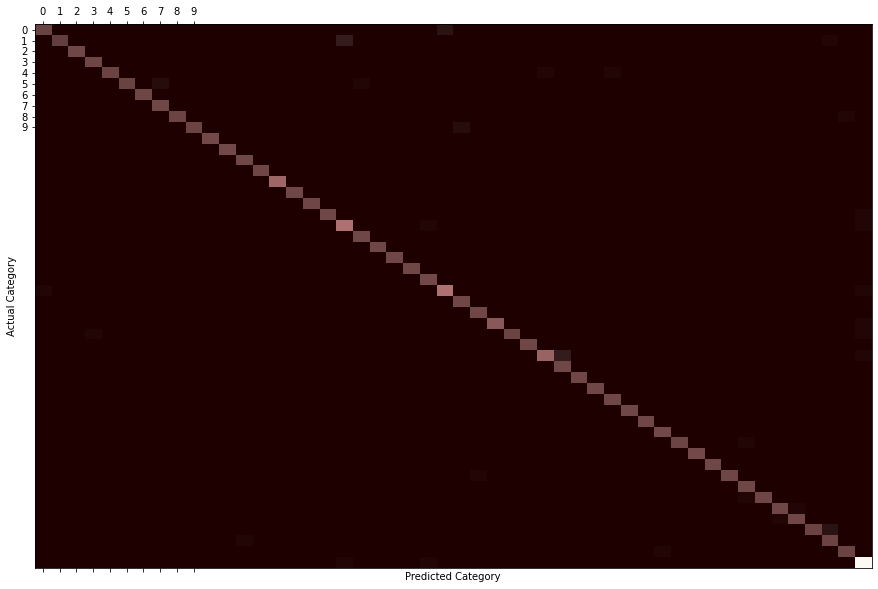

In [30]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(15,10))
ax.matshow(confusion_matrix, aspect='auto', vmin=0, vmax=1000, cmap=plt.get_cmap('pink'))
plt.ylabel('Actual Category')
plt.yticks(range(10), classes)
plt.xlabel('Predicted Category')
plt.xticks(range(10), classes)
plt.show()


In [0]:
import os

import torch
import torch.utils.data
import torchvision
from torchvision import transforms

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

WORK_DIR = './data'
BATCH_SIZE = 200

MODEL_PATH = './model'
MODEL_NAME = 'Inception_v3.pth'
# Create model
#ot os.path.exists(MODEL_PATH):
  #os.makedirs(MODEL_PATH)

transform = transforms.Compose([
  transforms.Resize((299,299), interpolation=2),
  transforms.ToTensor(),
  transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

# Load data
dataset = torchvision.datasets.CIFAR10(root=WORK_DIR,
                                        download=True,
                                        train=False,
                                        transform=transform)

dataset_loader = torch.utils.data.DataLoader(dataset=dataset,
                                             batch_size=BATCH_SIZE,
                                             shuffle=True)



In [0]:
def main():
  print(f"Val numbers:{len(dataset)}")

  # Load model
  if device == 'cuda':
    model = torch.load(MODEL_PATH + '/' + MODEL_NAME).to(device)
  else:
    model = torch.load(MODEL_PATH + '/' + MODEL_NAME, map_location='cpu')
  model.eval()

  correct = 0.
  total = 0
  for images, labels in dataset_loader:
    # to GPU
    images = images.to(device)
    labels = labels.to(device)
    # print prediction
    outputs = model(images)
    # equal prediction and acc
    _, predicted = torch.max(outputs.data, 1)
    # val_loader total
    total += labels.size(0)
    # add correct
    correct += (predicted == labels).sum().item()

  print(f"Acc: {correct / total:.4f}.")

In [0]:
if __name__ == '__main__':
  main()

Validation
